## Steps for Building the Model

1. Data Cleaning

1. Data Collection & Manipulation

1. Data Analysis

1. Data Pre-Processing

1. Splitting the data into Training data & Testing Data

1. Model Training

1. Model Evaluation

1. Testing the Model


In [29]:
# Importing the Dependencies/libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 1 Data-Cleaning

In [30]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./unclean_data.csv' , delimiter=',')  # specify your own


# Display the original DataFrame
print("Original DataFrame:")
print(df)


# Convert the 'AGE' column to numeric, replacing non-numeric values with NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')


# Task 1: Find the average age (excluding values greater than or equal to 100)
average_age = df.loc[df['age'] < 100, 'age'].mean()


# Display the average age
print("\nAverage Age (excluding values >= 100):", average_age)


# Replace values in the 'AGE' column with the calculated average
df.loc[df['age'] >= 100, 'age'] = average_age
df['age'] = df['age'].astype(int)




# Task 2: Find the most frequent gender
most_frequent_gender = df['sex'].mode()[0]


# Display the most frequent gender
print("\nMost Frequent Gender:", most_frequent_gender)


# Replace NaN values in the 'GENDER' column with the most frequent gender
df['sex'].fillna(most_frequent_gender, inplace=True)


# Display the DataFrame after cleaning
print("\nCleaned DataFrame:")
print(df)


# Update the CSV file with the cleaned DataFrame
df.to_csv('cleaned_data.csv', index=False)

Original DataFrame:
      age     sex   bmi  children smoker     region  charges
0      18    male  23.2         0     no  southeast   1121.9
1     118    male  30.1         0     no  southeast   1121.9
2      18     NaN  33.3         0     no  southeast   1121.9
3      18    male  33.7         0     no  southeast   1121.9
4      18    male  34.1         0     no  southeast   1121.9
...   ...     ...   ...       ...    ...        ...      ...
1333   33  female  35.5         0    yes  northwest  55135.4
1334   31  female  38.1         1    yes  northeast  58571.1
1335  512    male  34.5         3    yes  northwest  60021.4
1336   45    male  30.4         0    yes  southeast  62592.9
1337   54     NaN  47.4         0    yes  southeast  63770.4

[1338 rows x 7 columns]

Average Age (excluding values >= 100): 39.04783599088838

Most Frequent Gender: male

Cleaned DataFrame:
      age     sex   bmi  children smoker     region  charges
0      18    male  23.2         0     no  southeast   11

# **Step2**

*   Data Collection and Manipulation



In [31]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('./cleaned_data.csv')

In [32]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,18,male,23.2,0,no,southeast,1121.9
1,39,male,30.1,0,no,southeast,1121.9
2,18,male,33.3,0,no,southeast,1121.9
3,18,male,33.7,0,no,southeast,1121.9
4,18,male,34.1,0,no,southeast,1121.9


In [33]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [34]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
insurance_dataset.duplicated().sum()

1

In [37]:
insurance_dataset.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,18,male,23.2,0,no,southeast,1121.9
1,39,male,30.1,0,no,southeast,1121.9
2,18,male,33.3,0,no,southeast,1121.9
3,18,male,33.7,0,no,southeast,1121.9
4,18,male,34.1,0,no,southeast,1121.9
...,...,...,...,...,...,...,...
1333,33,female,35.5,0,yes,northwest,55135.4
1334,31,female,38.1,1,yes,northeast,58571.1
1335,39,male,34.5,3,yes,northwest,60021.4
1336,45,male,30.4,0,yes,southeast,62592.9


In [38]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical Features from the table are:

Sex <br>
Smoker <br>
Region

# **Step3**

* Data Analysis/visualization Part

In [39]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.047085,30.665471,1.094918,13268.909716
std,13.889510,6.098382,1.205493,12111.518103
min,18.000000,16.000000,0.000000,1121.900000
25%,27.000000,26.300000,0.000000,4740.300000
50%,39.000000,30.400000,1.000000,9382.050000
75%,51.000000,34.700000,2.000000,16639.900000
max,64.000000,53.100000,5.000000,63770.400000


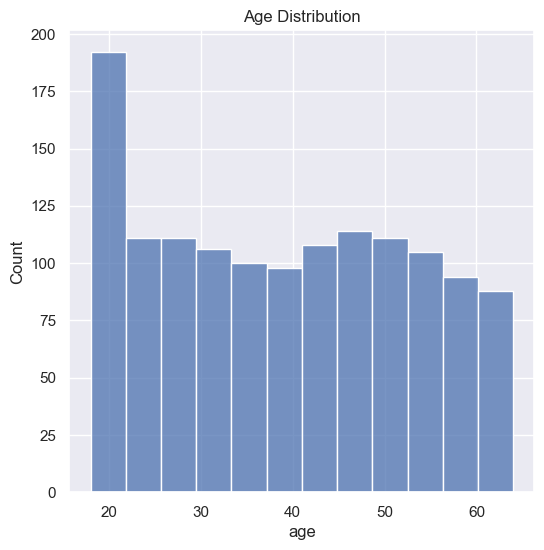

In [40]:
sns.set_theme()
plt.figure(figsize=(6,6))
sns.histplot(x='age', data=insurance_dataset)
plt.title('Age Distribution')
plt.show()

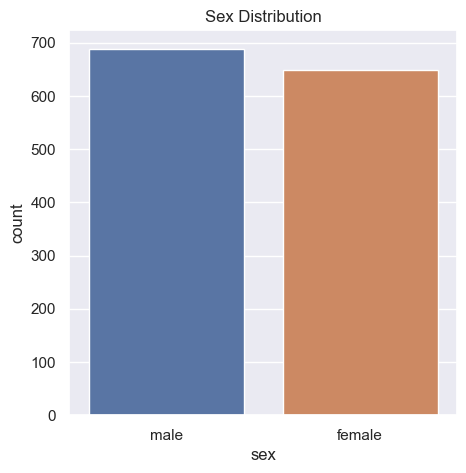

In [41]:
# Gender column
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

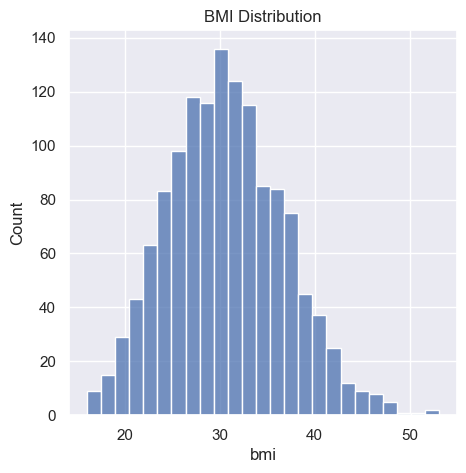

In [42]:
# bmi distribution
plt.figure(figsize=(5,5))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

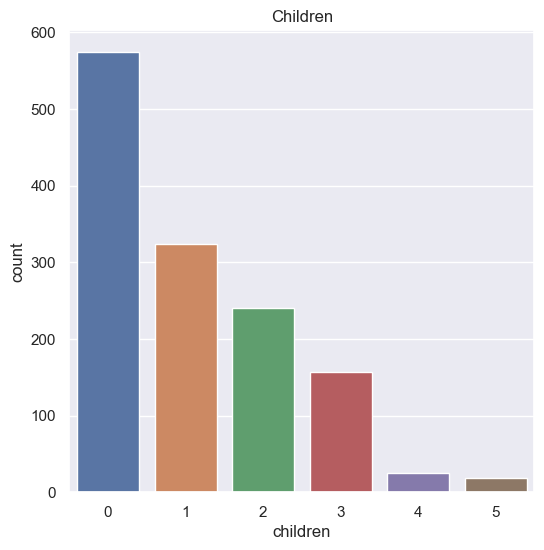

In [43]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

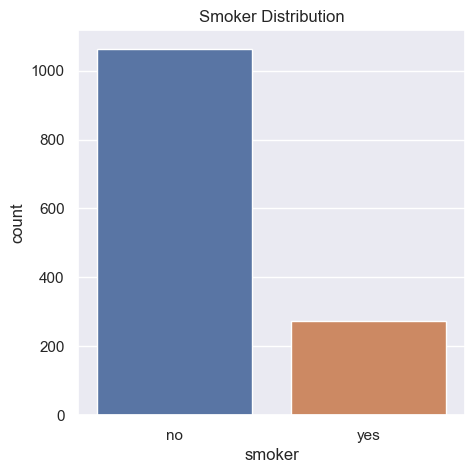

In [44]:
# smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

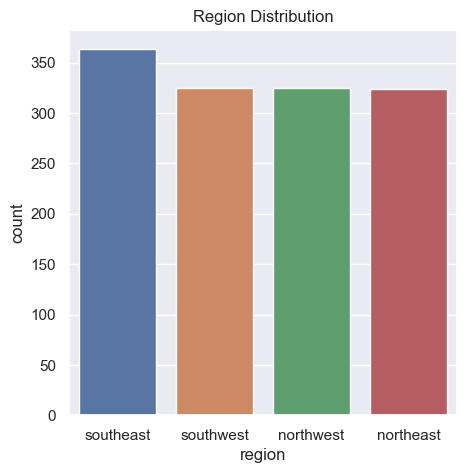

In [45]:
# region column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

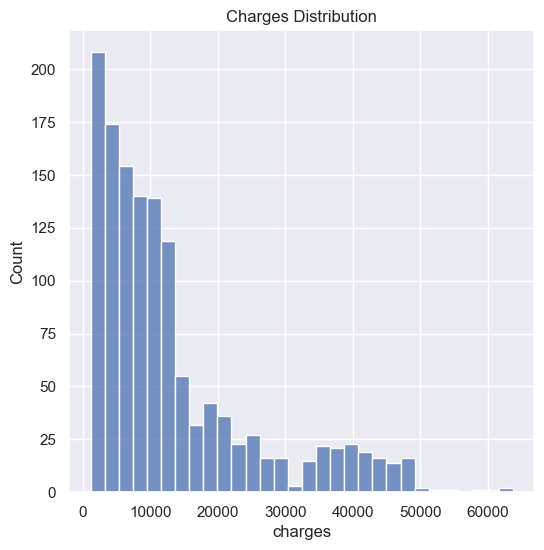

In [46]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# **step4**

* Data Pre-Processing

In [47]:
# Encoding the categorical features to Numeric value

# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [48]:
# checking the dataset
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,33,1,35.5,0,0,3,55135.4
1334,31,1,38.1,1,0,2,58571.1
1335,39,0,34.5,3,0,3,60021.4
1336,45,0,30.4,0,0,0,62592.9
1337,54,0,47.4,0,0,0,63770.4


In [49]:
# Splitting the Features and Target

X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
print("Features")
print(X)
print()
print("Labels")
print(Y)

Features
      age  sex   bmi  children  smoker  region
0      18    0  23.2         0       1       0
1      39    0  30.1         0       1       0
2      18    0  33.3         0       1       0
3      18    0  33.7         0       1       0
4      18    0  34.1         0       1       0
...   ...  ...   ...       ...     ...     ...
1333   33    1  35.5         0       0       3
1334   31    1  38.1         1       0       2
1335   39    0  34.5         3       0       3
1336   45    0  30.4         0       0       0
1337   54    0  47.4         0       0       0

[1338 rows x 6 columns]

Labels
0        1121.9
1        1121.9
2        1121.9
3        1121.9
4        1121.9
         ...   
1333    55135.4
1334    58571.1
1335    60021.4
1336    62592.9
1337    63770.4
Name: charges, Length: 1338, dtype: float64


# **Step5**

* Splitting the data into Training data & Testing Data


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# **Step6**

* Model Training

## Linear Regression Algorithm

In [51]:
# loading the Linear Regression model
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression()

# **Step7**

Model Evaluation

In [52]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7456473081640458


In [53]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7582671119747251


# **step 8**

Testing The Predictive System

In [54]:
input_data = (24,0,35.9,0,1,2)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The insurance cost is $', "{:.2f}".format(prediction[0]) )

The insurance cost is $ 5985.16


C:\Users\shivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
